In [1]:
import mne
import os
from os.path import abspath
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mne.time_frequency import psd_welch
from tqdm import tqdm
import itertools
import warnings
warnings.filterwarnings("ignore")
from multiprocessing import Process
file_path="/media/kashraf/Elements/data_gen_may_2021/EEG data/Audio/"
filename=os.listdir(file_path)
path_montage="/media/kashraf/Elements/data_gen_may_2021/montage/"
montage=mne.channels.read_montage(path_montage+"//"+"neuroscan64ch.loc")
raw_data=[]
for file in tqdm(filename):
    files=mne.io.read_raw_cnt(file_path+"/"+file,montage=montage, preload=True,verbose=False);
    raw_data.append(files)

## Selecting channels to include
good_ch= mne.pick_channels(raw_data[0].info['ch_names'], include=[],
                        exclude=["EKG","EMG",'VEO','HEO','Trigger'])
mne.pick_info(raw_data[0].info,sel=good_ch,copy=False,verbose=False)
for f in tqdm(raw_data):
    mne.pick_info(f.info,sel=good_ch,copy=False)
    f.set_montage(montage)

100%|██████████████████████████████████████████| 11/11 [00:00<00:00, 422.00it/s]


In [2]:
events= mne.events_from_annotations(raw_data[6])

# event_id_recall={'12': 1, '14': 2, '16': 3, '18': 4}
# event_id_encoding={"22":1,"24":2,"26":3,"28":4}
# # event_id_answer={""}
# event_id_answer={"51":9,"52":10}
events


Used Annotations descriptions: ['22', '24', '255', '26', '28', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '51', '52', '62', '64', '66', '68']


(array([[   639,      0,      3],
        [   821,      0,      3],
        [  1038,      0,      3],
        ...,
        [639996,      0,      3],
        [640492,      0,      3],
        [641200,      0,      3]]),
 {'22': 1,
  '24': 2,
  '255': 3,
  '26': 4,
  '28': 5,
  '31': 6,
  '32': 7,
  '33': 8,
  '34': 9,
  '35': 10,
  '36': 11,
  '37': 12,
  '38': 13,
  '39': 14,
  '40': 15,
  '41': 16,
  '42': 17,
  '43': 18,
  '44': 19,
  '45': 20,
  '51': 21,
  '52': 22,
  '62': 23,
  '64': 24,
  '66': 25,
  '68': 26})

In [3]:
info=raw_data[1].info
# info

In [4]:
import multiprocessing
from tqdm import tqdm
data=dict()
for i in range(len(raw_data)):
    data[i+1]={
    2:mne.Epochs(raw_data[i], events[0], event_id=1).get_data(),
    4:mne.Epochs(raw_data[i], events[0], event_id=2).get_data(),
    6:mne.Epochs(raw_data[i], events[0], event_id=4).get_data(),
    8:mne.Epochs(raw_data[i], events[0], event_id=5).get_data(),
    }

45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matchin

0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped
45 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 45 events and 176 original time points ...
0 bad epochs dropped


### Single trial data for each cognitive load

In [5]:
cl2_data=np.concatenate([data[sub][2] for sub in data])
cl4_data=np.concatenate([data[sub][4] for sub in data])
cl6_data=np.concatenate([data[sub][6] for sub in data])
cl8_data=np.concatenate([data[sub][8] for sub in data])


#### Single trial power spectral density

In [6]:
# def psd_gen(dataset):
#     psds=[]
#     for i in tqdm(range(dataset.shape[0])):
#         trial_data=np.reshape(dataset[i],(1,64,176))
#         trial_data=mne.EpochsArray(trial_data,info=raw_data[0].info,verbose=0)
#         psd,freq= mne.time_frequency.psd_welch(trial_data,n_fft=176,verbose=0)
#         psd= np.average(psd,axis=2).flatten()
#         psds.append(psd)
#     return np.array(psds)
# cl2_psd=psd_gen(cl2_data)
# cl4_psd=psd_gen(cl4_data)
# cl6_psd=psd_gen(cl6_data)
# cl8_psd=psd_gen(cl8_data)

#### PCA and choice of components

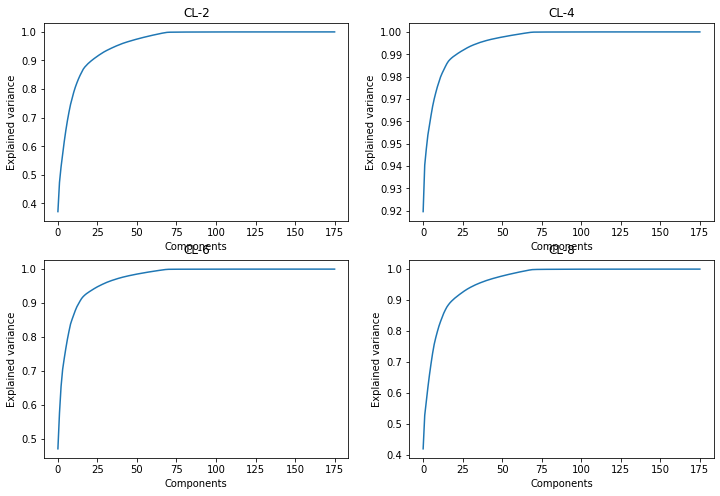

In [7]:
from sklearn.decomposition import PCA
pca=PCA()
explained_var2=pca.fit(np.concatenate(cl2_data)).explained_variance_
explained_var4=pca.fit(np.concatenate(cl4_data)).explained_variance_
explained_var6=pca.fit(np.concatenate(cl6_data)).explained_variance_
explained_var8=pca.fit(np.concatenate(cl8_data)).explained_variance_
titles=["CL-2","CL-4","CL-6","CL-8"]
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,8))
for ax, var,title in zip(axes.flatten(),[explained_var2,explained_var4,explained_var6,explained_var8],titles):
    ax.plot(np.cumsum(var/sum(var)))
    ax.set_title(title)
    ax.set_ylabel("Explained variance")
    ax.set_xlabel("Components")

### Bootstrap sampling 

In [8]:
from tqdm import tqdm

n_trials= 20# Number of trials to be selected and be averaged out to give one ERP
n_erp= 1000 # Nmber of ERPS required per subject per CL level. So for cL2 we have 1000*11 Erp

def bootstrap(event,trials, n_trials,n_erps):
    erps=[]
    for i in range(n_erps):
        t=np.random.choice(trials,n_trials)
        erp = np.average(event[t],axis=0)
        erps.append(erp)
    return erps
for i in tqdm(range(len(data))):
    data[i+1]["erp2"]=bootstrap(data[i+1][2], data[i+1][2].shape[0],n_trials,n_erp)
    data[i+1]["erp4"]=bootstrap(data[i+1][4], data[i+1][4].shape[0],n_trials,n_erp)
    data[i+1]["erp6"]=bootstrap(data[i+1][6], data[i+1][6].shape[0],n_trials,n_erp)
    data[i+1]["erp8"]=bootstrap(data[i+1][8], data[i+1][8].shape[0],n_trials,n_erp)

## Transform our data into epoch array
# from tqdm import tqdm
# def bootstrap_process(start):


100%|███████████████████████████████████████████| 11/11 [00:08<00:00,  1.26it/s]


In [9]:
# for sub in tqdm(data):
#     for i in range(1000):
#         data[sub]["erp2"][i]=np.reshape(data[sub]["erp2"][i],(1,64,176))
#         data[sub]["erp2"][i]=mne.EpochsArray(data[sub]["erp2"][i],info=raw_data[0].info,verbose=0)

#         data[sub]["erp4"][i]=np.reshape(data[sub]["erp4"][i],(1,64,176))
#         data[sub]["erp4"][i]=mne.EpochsArray(data[sub]["erp4"][i],info=raw_data[0].info,verbose=0)

#         data[sub]["erp6"][i]=np.reshape(data[sub]["erp6"][i],(1,64,176))
#         data[sub]["erp6"][i]=mne.EpochsArray(data[sub]["erp6"][i],info=raw_data[0].info,verbose=0)

#         data[sub]["erp8"][i]=np.reshape(data[sub]["erp8"][i],(1,64,176))
#         data[sub]["erp8"][i]=mne.EpochsArray(data[sub]["erp8"][i],info=raw_data[0].info,verbose=0)

In [10]:
# def psd_bootstrap(erp_level):
#     psds=[]
#     for sub in data:
#         for i in range(1000):
#             erp_data=data[sub][erp_level][i]
#             psd,freq= mne.time_frequency.psd_welch(erp_data,n_fft=176,verbose=0)
#             psd= np.average(psd,axis=2).flatten()
#             psds.append(psd)
#     return np.array(psds)
# p_density_cl2=psd_bootstrap("erp2")
# p_density_cl4=psd_bootstrap("erp4")
# p_density_cl6=psd_bootstrap("erp6")
# p_density_cl8=psd_bootstrap("erp8")
            

In [11]:
# recons=pca_projection_reconstruction(cl8_psd,p_density_cl8,1)
# error= np.linalg.norm(recons-p_density_cl8,axis=1)
# plt.hist(error)
# plt.show()


In [12]:

def pca_projection_reconstruction(trial_data,erp_data,n_components):
    pca=PCA(n_components=n_components)
    pca.fit(trial_data)
    eigen_space=pca.components_
    reconstructed=[]
    for erp in erp_data:     
    # Project Erp into these space
        projected_erp=pca.transform(erp)
        recons=np.dot(projected_erp,eigen_space)
        reconstructed.append(recons)
    return np.array(reconstructed)
    

In [13]:
# original_data=np.concatenate(cl4_data)
# erps=np.array(data[1]['erp2'])
# data_recon=pca_projection_reconstruction(original_data,erps,10)

In [14]:
# error=erps-np.array(data_recon)
# recon_error=[sum(np.linalg.norm(err,axis=1)) for err in error] 

In [15]:
def generate_rec_error(single_data,erp):
    # generate reconstruction erros for boot strapp sample
    reconstructed=pca_projection_reconstruction(trial_data=single_data,erp_data=erp,n_components=75)
    error=erp-np.array(reconstructed)
    recon_error=[sum(np.linalg.norm(err,axis=1)) for err in error]
    return recon_error
    

In [16]:
def ci_data_selection(errors):
    sorted_data=np.sort(errors)
    l_limit= np.percentile(sorted_data,25)
    u_limit=np.percentile(sorted_data,75)
    id_selected=[]
    for index , err in enumerate(errors):
        if l_limit<=err and err<=u_limit:
            id_selected.append(index)
#         else:
#             print(err)
    return id_selected
    

In [17]:
for sub in tqdm(data):
    rec_error2=generate_rec_error(np.concatenate(data[sub][2]),data[sub]["erp2"])
    index2=ci_data_selection(rec_error2)
    data[sub]["erp2"]=mne.EpochsArray(data[sub]["erp2"],info=raw_data[2].info)[index2]
    
    rec_error4=generate_rec_error(np.concatenate(data[sub][4]),data[sub]["erp4"])
    index4=ci_data_selection(rec_error4)
    data[sub]["erp4"]=mne.EpochsArray(data[sub]["erp4"],info=raw_data[2].info)[index4]
    
    rec_error6=generate_rec_error(np.concatenate(data[sub][6]),data[sub]["erp6"])
    index6=ci_data_selection(rec_error6)
    data[sub]["erp6"]=mne.EpochsArray(data[sub]["erp6"],info=raw_data[2].info)[index6]
    
    rec_error8=generate_rec_error(np.concatenate(data[sub][8]),data[sub]["erp8"])
    index8=ci_data_selection(rec_error8)
    data[sub]["erp8"]=mne.EpochsArray(data[sub]["erp8"],info=raw_data[2].info)[index8]

  0%|                                                    | 0/11 [00:00<?, ?it/s]

1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


  9%|████                                        | 1/11 [00:06<01:00,  6.00s/it]

1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


 18%|████████                                    | 2/11 [00:12<00:55,  6.22s/it]

1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


 27%|████████████                                | 3/11 [00:18<00:50,  6.37s/it]

1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


 36%|████████████████                            | 4/11 [00:24<00:42,  6.13s/it]

1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


 45%|████████████████████                        | 5/11 [00:30<00:36,  6.04s/it]

1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


 55%|████████████████████████                    | 6/11 [00:36<00:29,  5.89s/it]

1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


 64%|████████████████████████████                | 7/11 [00:41<00:23,  5.78s/it]

1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


 73%|████████████████████████████████            | 8/11 [00:47<00:17,  5.82s/it]

1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


 82%|████████████████████████████████████        | 9/11 [00:53<00:11,  5.88s/it]

1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


 91%|███████████████████████████████████████    | 10/11 [00:58<00:05,  5.71s/it]

1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1000 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


100%|███████████████████████████████████████████| 11/11 [01:04<00:00,  5.90s/it]


### Wavelet transform and interval data generation

In [18]:
freqs= np.arange(1,30)
n_c=freqs/3
test = data[1]["erp2"]
wt = mne.time_frequency.tfr_array_morlet(test,sfreq=250,freqs=freqs,n_cycles=n_c)

In [19]:
from matplotlib import cm
from multiprocessing import Manager
manager=Manager()
data_new=manager.dict()
data_new= data

class topo_generator:
    def __init__(self, subject,freqs,sfreq =250,t_interval=None,n_cycles=None,cl_level=None):
        self.subject = subject
        self.freqs = freqs
        self.sfreq = sfreq
        self.n_cycles = n_cycles
        self.cl_level = cl_level
        self.t_interval = t_interval
        
    def get_wt_array (self):
        # EXtract epoch data and get wt 
        epoch_data = data_new[self.subject]["erp"+str(self.cl_level)]
        wavelets = mne.time_frequency.tfr_array_morlet(epoch_data,sfreq=self.sfreq,
                                                       freqs=self.freqs,n_cycles=self.n_cycles,output="power")
#         print(wavelets.shape)
        wavelet_interval = wavelets[:,:,:,self.t_interval[0]:self.t_interval[1]]
        wavelet_interval = np.mean (wavelet_interval,axis=(2,3))
        
        return wavelet_interval
    
    def generate_topos (self,path,cmap):
        sub_psd = self.get_wt_array()
        for i in range (sub_psd.shape[0]):
            mean_psd = sub_psd[i]
#             print(mean_psd)
            # Save topo and load it
            fig=mne.viz.plot_topomap(mean_psd,pos=info,cmap=cmap,contours=False,show=False)
            fig_name="Sub_" + str(self.subject) + "-CL_"+ str(self.cl_level)+"-Trial_" + str(i) + "-Interv_" + str(int(self.t_interval[1]/25)) + ".png"
            interval = "interv"+str(int(self.t_interval[1]/25))
            fig[0].get_figure().savefig(os.path.join(path,interval,"cl"+str(self.cl_level),fig_name),bbox_inches='tight', transparent=True,
                                         pad_inches=0)
            plt.close("all")
            plt.show("off")
            
        


In [47]:
frqs = np.arange (13,30)
n_cycles = (1/3)*frqs
t_interval = (150,175)
cl_level = 2
path = "/media/kashraf/Elements/Dissertation/data/preprocessed/audio/beta/"
def generation_process(start,end):
    for sub in tqdm(range(start,end)):
        topo_gen = topo_generator(subject=sub,freqs=frqs,t_interval=t_interval,n_cycles= n_cycles,cl_level=cl_level)
        topo_gen.generate_topos(path,cmap="Reds")
            


if __name__=="__main__":
    p1= Process(target=generation_process,args=(1,2))
    p2= Process(target=generation_process,args=(2,3))
    p3= Process(target=generation_process,args=(3,4))
    p4= Process(target=generation_process,args=(4,5))
    p5= Process(target=generation_process,args=(5,6))
    
    p6 = Process(target=generation_process,args=(6,7))
    p7 = Process(target=generation_process,args=(7,8))
    p8 = Process(target=generation_process,args=(8,9))
    p9 = Process(target=generation_process,args=(9,10))
    p10 = Process(target=generation_process,args=(10,12))
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    p6.start()
    p7.start()
    p8.start()
    p9.start()
    p10.start()
   
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()
    p6.join()
    p7.join()
    p8.join()
    p9.join()
    p10.join()
    
    print("Done")
    

100%|█████████████████████████████████████████████| 2/2 [03:07<00:00, 93.54s/it]


Done


In [48]:
ffrqs = np.arange (13,30)
n_cycles = (1/3)*frqs
cl_level = 4
path = "/media/kashraf/Elements/Dissertation/data/preprocessed/audio/beta/"
def generation_process(start,end):
    for sub in tqdm(range(start,end)):
        topo_gen = topo_generator(subject=sub,freqs=frqs,t_interval=t_interval,n_cycles= n_cycles,cl_level=cl_level)
        topo_gen.generate_topos(path,cmap="Reds")
            


if __name__=="__main__":
    p1= Process(target=generation_process,args=(1,2))
    p2= Process(target=generation_process,args=(2,3))
    p3= Process(target=generation_process,args=(3,4))
    p4= Process(target=generation_process,args=(4,5))
    p5= Process(target=generation_process,args=(5,6))
    
    p6 = Process(target=generation_process,args=(6,7))
    p7 = Process(target=generation_process,args=(7,8))
    p8 = Process(target=generation_process,args=(8,9))
    p9 = Process(target=generation_process,args=(9,10))
    p10 = Process(target=generation_process,args=(10,12))
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    p6.start()
    p7.start()
    p8.start()
    p9.start()
    p10.start()
   
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()
    p6.join()
    p7.join()
    p8.join()
    p9.join()
    p10.join()
    
    print("Done")
    

100%|█████████████████████████████████████████████| 2/2 [02:58<00:00, 89.16s/it]


Done


In [49]:
frqs = np.arange (13,30)
n_cycles = (1/3)*frqs
cl_level = 6
path = "/media/kashraf/Elements/Dissertation/data/preprocessed/audio/beta/"
def generation_process(start,end):
    for sub in tqdm(range(start,end)):
        topo_gen = topo_generator(subject=sub,freqs=frqs,t_interval=t_interval,n_cycles= n_cycles,cl_level=cl_level)
        topo_gen.generate_topos(path,cmap="Reds")
            


if __name__=="__main__":
    p1= Process(target=generation_process,args=(1,2))
    p2= Process(target=generation_process,args=(2,3))
    p3= Process(target=generation_process,args=(3,4))
    p4= Process(target=generation_process,args=(4,5))
    p5= Process(target=generation_process,args=(5,6))
    
    p6 = Process(target=generation_process,args=(6,7))
    p7 = Process(target=generation_process,args=(7,8))
    p8 = Process(target=generation_process,args=(8,9))
    p9 = Process(target=generation_process,args=(9,10))
    p10 = Process(target=generation_process,args=(10,12))
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    p6.start()
    p7.start()
    p8.start()
    p9.start()
    p10.start()
   
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()
    p6.join()
    p7.join()
    p8.join()
    p9.join()
    p10.join()
    
    print("Done")
    

100%|█████████████████████████████████████████████| 2/2 [02:54<00:00, 87.01s/it]


Done


In [50]:
frqs = np.arange (13,30)
n_cycles = (1/3)*frqs
cl_level = 8
path = "/media/kashraf/Elements/Dissertation/data/preprocessed/audio/beta/"
def generation_process(start,end):
    for sub in tqdm(range(start,end)):
        topo_gen = topo_generator(subject=sub,freqs=frqs,t_interval=t_interval,n_cycles= n_cycles,cl_level=cl_level)
        topo_gen.generate_topos(path,cmap="Reds")
            


if __name__=="__main__":
    p1= Process(target=generation_process,args=(1,2))
    p2= Process(target=generation_process,args=(2,3))
    p3= Process(target=generation_process,args=(3,4))
    p4= Process(target=generation_process,args=(4,5))
    p5= Process(target=generation_process,args=(5,6))
    
    p6 = Process(target=generation_process,args=(6,7))
    p7 = Process(target=generation_process,args=(7,8))
    p8 = Process(target=generation_process,args=(8,9))
    p9 = Process(target=generation_process,args=(9,10))
    p10 = Process(target=generation_process,args=(10,12))
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    p6.start()
    p7.start()
    p8.start()
    p9.start()
    p10.start()
   
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()
    p6.join()
    p7.join()
    p8.join()
    p9.join()
    p10.join()
    
    print("Done")
    

100%|█████████████████████████████████████████████| 2/2 [02:53<00:00, 86.67s/it]


Done
